<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

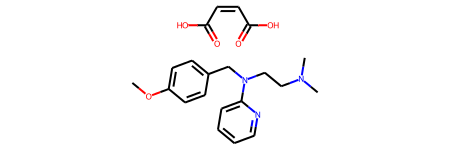

In [4]:
mol=Chem.MolFromSmiles ('COc1ccc(CN(CCN(C)C)c2ccccn2)cc1.O=C(O)/C=C\C(=O)O')
mol

In [5]:
smiles = Chem.MolToSmiles(mol)
smiles

'COc1ccc(CN(CCN(C)C)c2ccccn2)cc1.O=C(O)/C=C\\C(=O)O'

In [9]:
mw = Descriptors.MolWt(mol)
mw

401.46300000000014

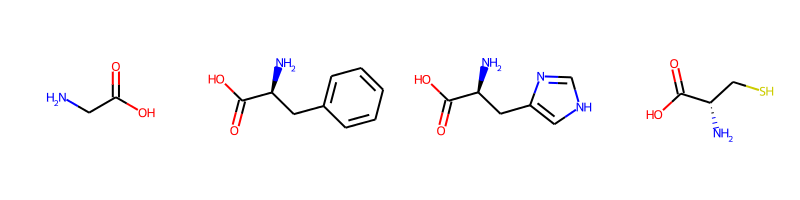

In [22]:
smiles_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O',
               'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
   mol=Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img
